<a href="https://colab.research.google.com/github/mandar196/HR_Analytics_Using_LogisticRegression/blob/master/HRAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Importing Libraries and Dataset**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading the data

train = pd.read_csv('drive/My Drive/Projects/HR Analytics/train.csv')
test = pd.read_csv('drive/My Drive/Projects/HR Analytics/test.csv')

# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


**Data Analysis**

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
# describing the training set

train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
# checking if there is any NULL value in the dataset

train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

**UNi-variate Data Visualization**

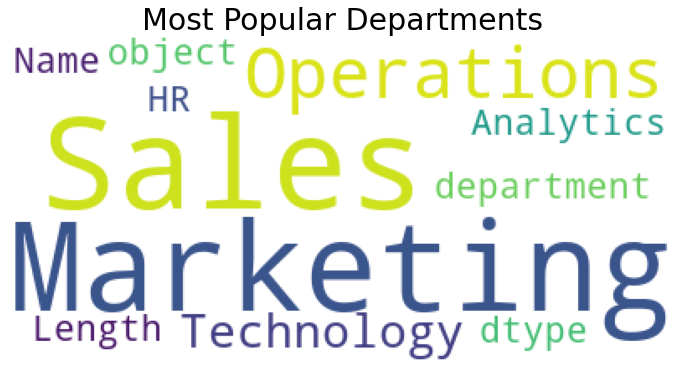

In [10]:
# looking at the most popular departments

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train['department']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [11]:
# checkig the no. of Employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [12]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


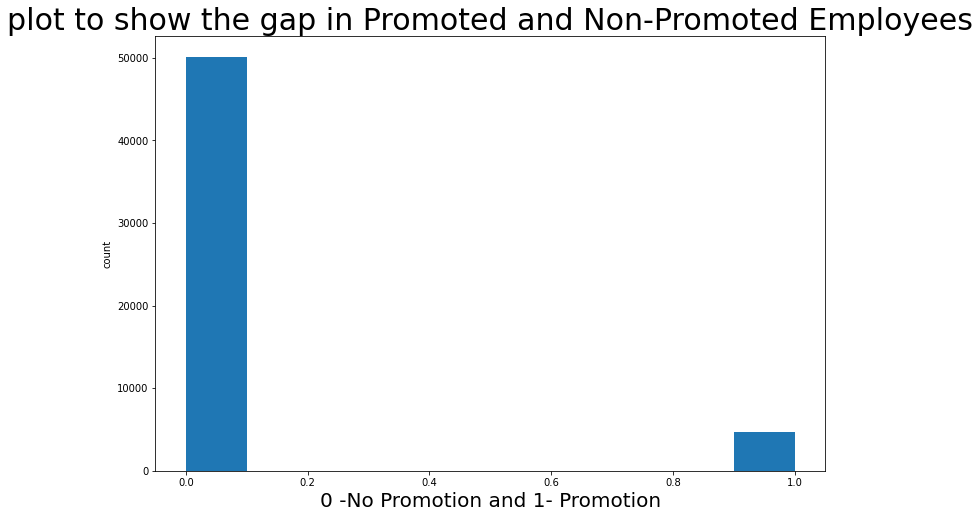

In [13]:
#plotting a scatter plot 

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

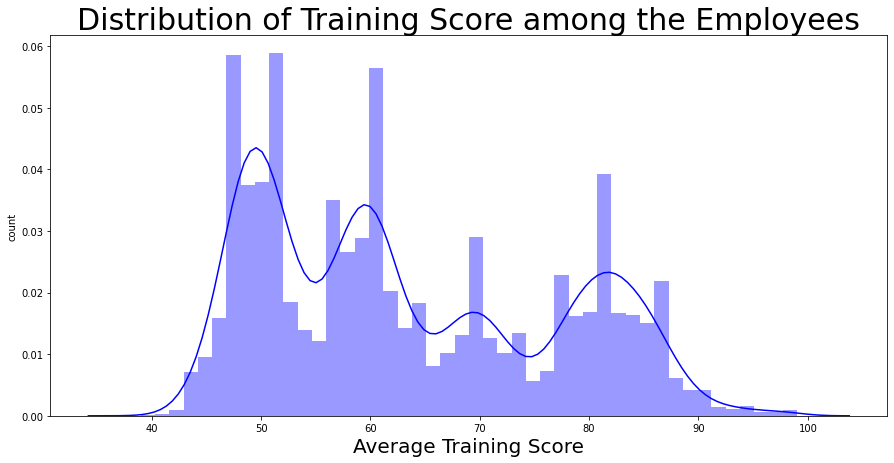

In [14]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [15]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

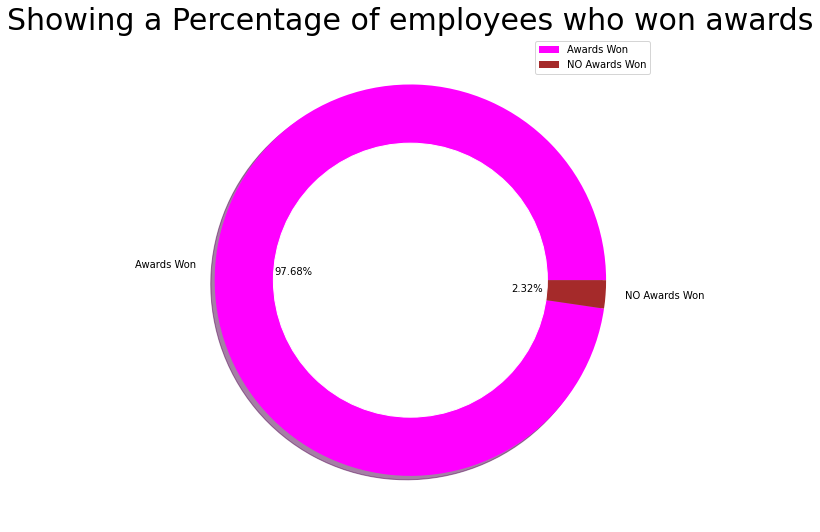

In [16]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538, 1270]
colors = ['magenta', 'brown']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [17]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

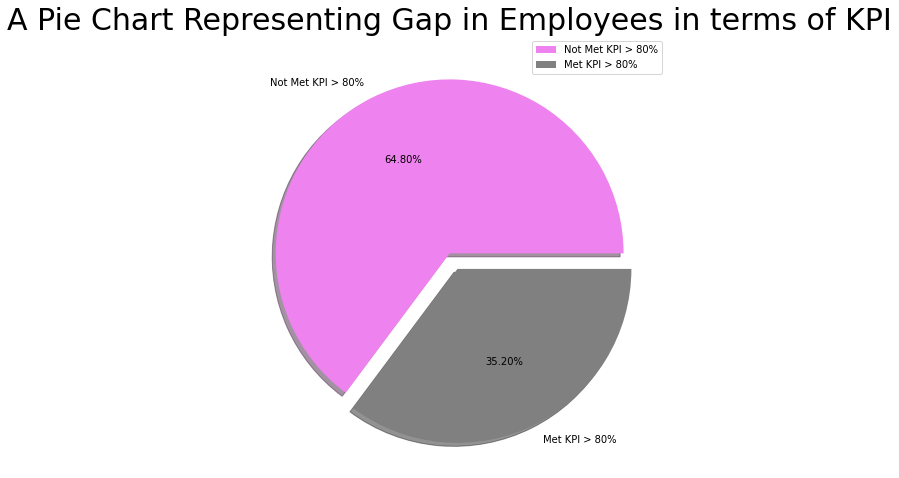

In [18]:
# plotting a pie chart


size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

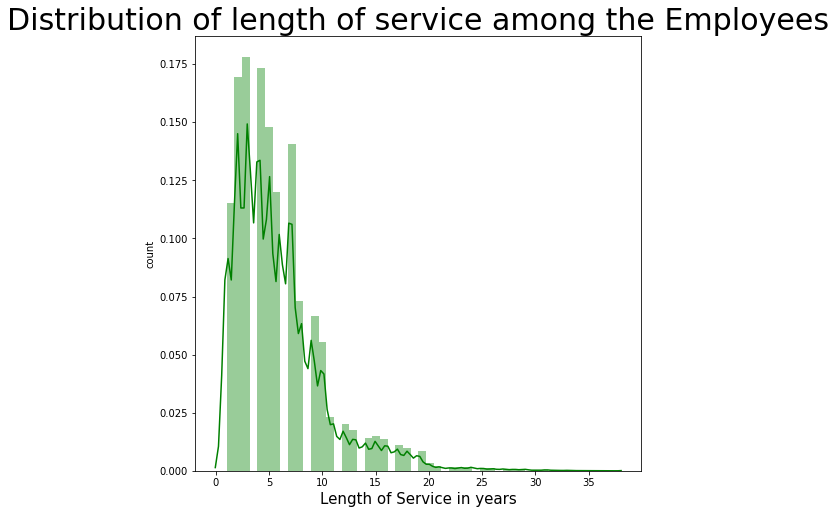

In [19]:
# checking the distribution of length of service

sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

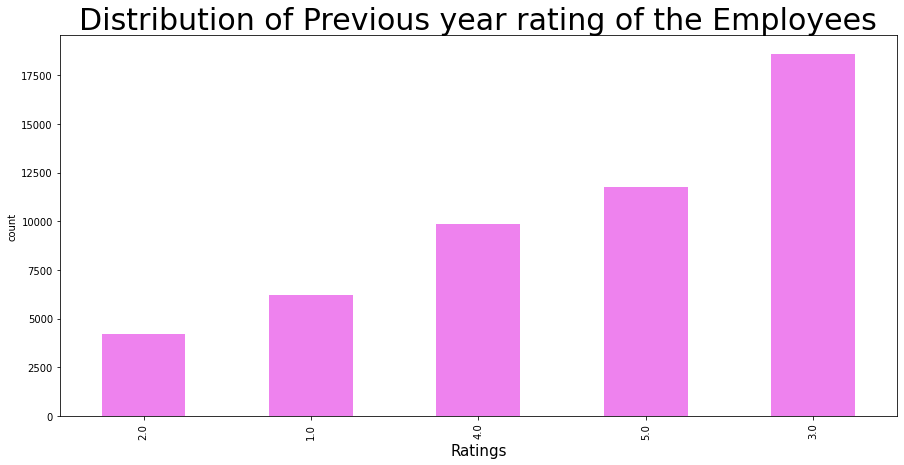

In [20]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

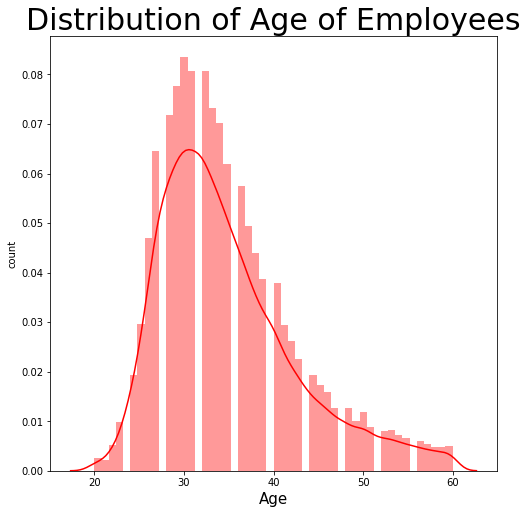

In [21]:
# checking the distribution of age of Employees in the company

sns.distplot(train['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

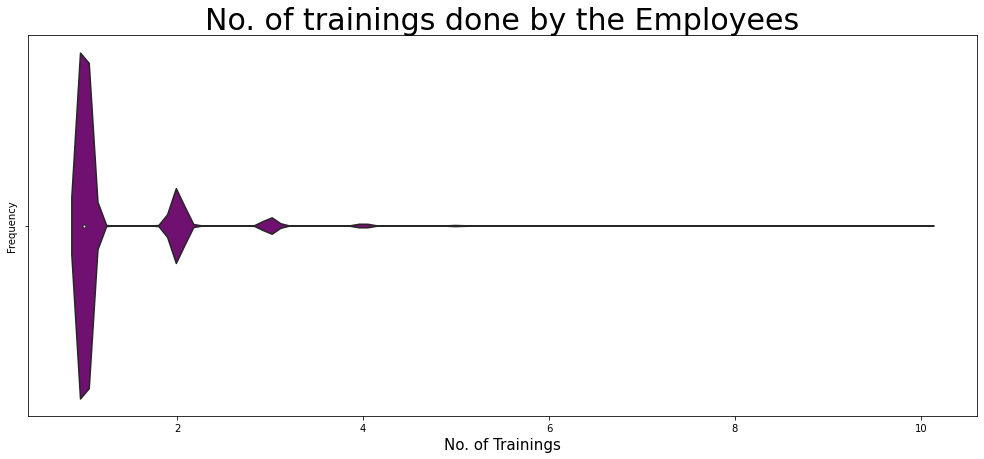

In [22]:
# checking the different no. of training done by the employees

plt.rcParams['figure.figsize'] = (17, 7)
sns.violinplot(train['no_of_trainings'], color = 'purple')
plt.title('No. of trainings done by the Employees', fontsize = 30)
plt.xlabel('No. of Trainings', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

In [23]:
# checking the different types of recruitment channels for the company

train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

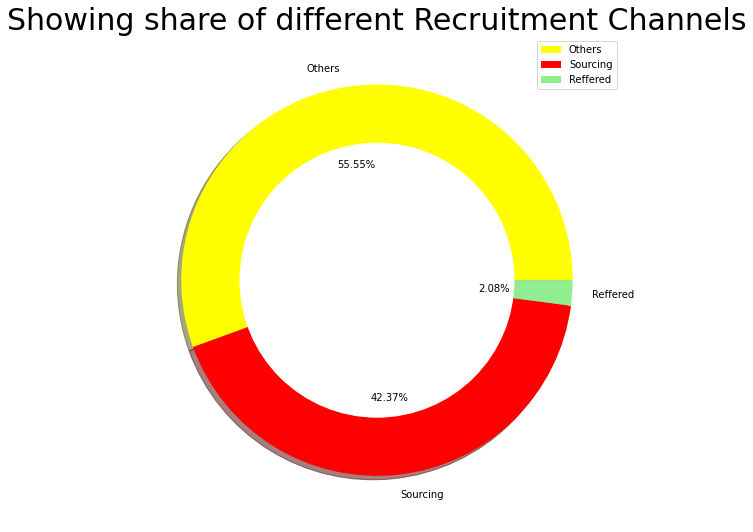

In [24]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['yellow', 'red', 'lightgreen']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

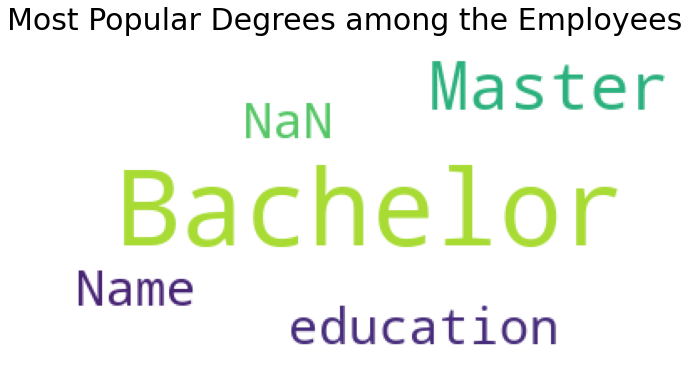

In [25]:
# checing the most popular education degree among the employees

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword, max_words = 5).generate(str(train['education']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Degrees among the Employees', fontsize = 30)
plt.axis('off')
plt.show()


In [26]:
# checking the gender gap

train['gender'].value_counts()


m    38496
f    16312
Name: gender, dtype: int64

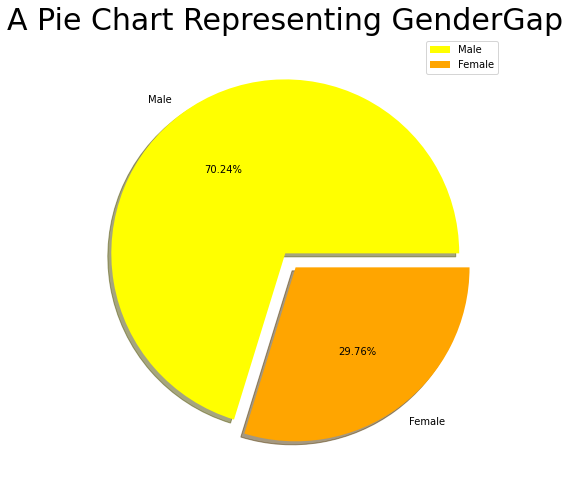

In [27]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

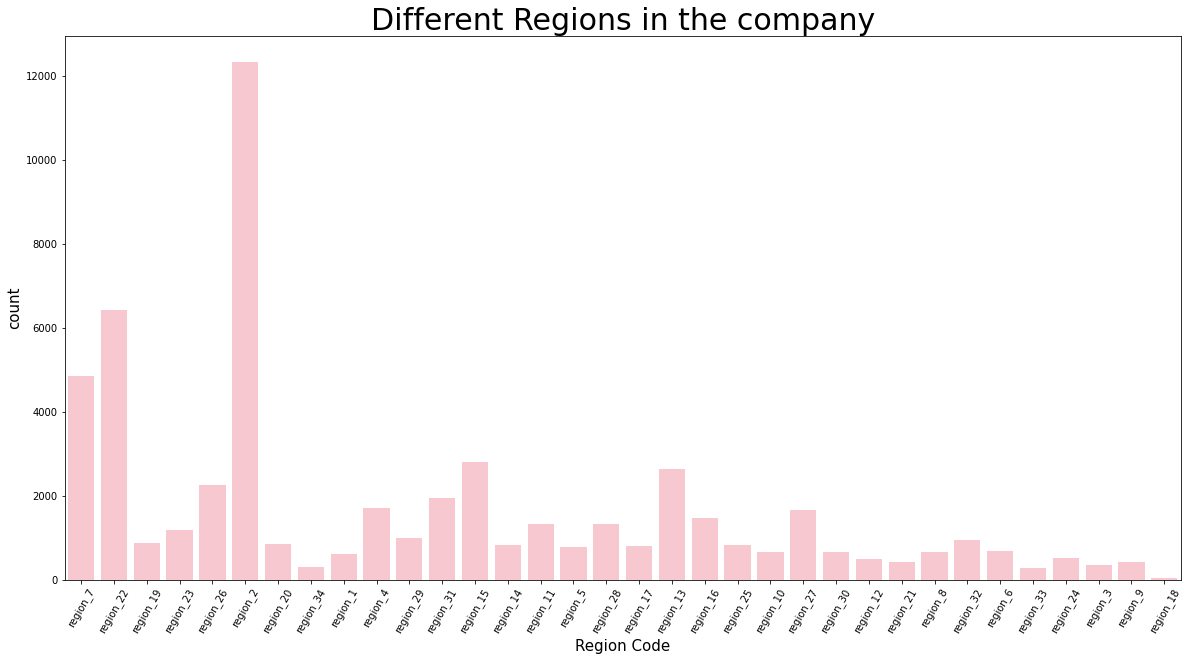

In [28]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['region'], color = 'pink')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

**Bi-varaiate Data Visualization**

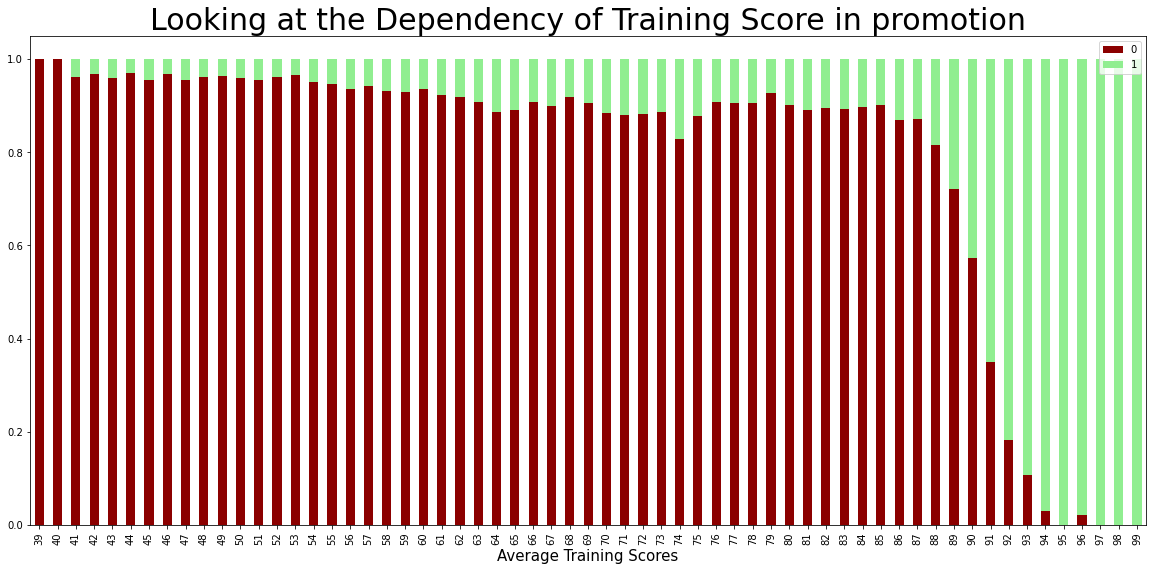

In [29]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

**As, the Training Scores Increases, the chances of Promotion Increases Highly**

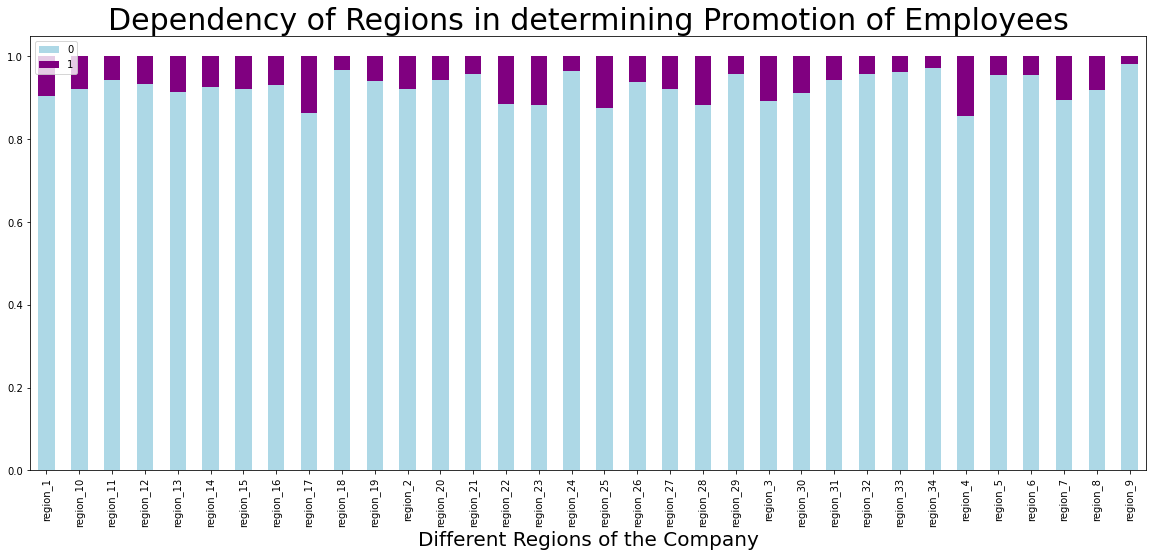

In [30]:
# checking dependency of different regions in promotion

data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

**The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.**

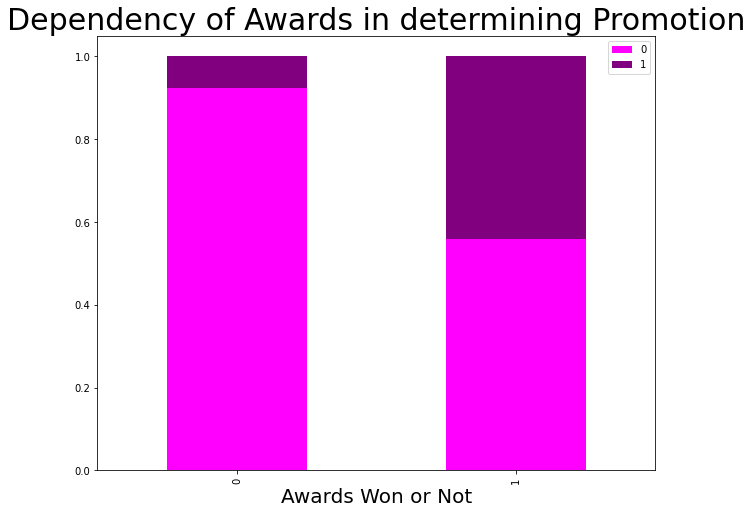

In [31]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

**There is a very good chance of getting promoted if the employee has won an award**

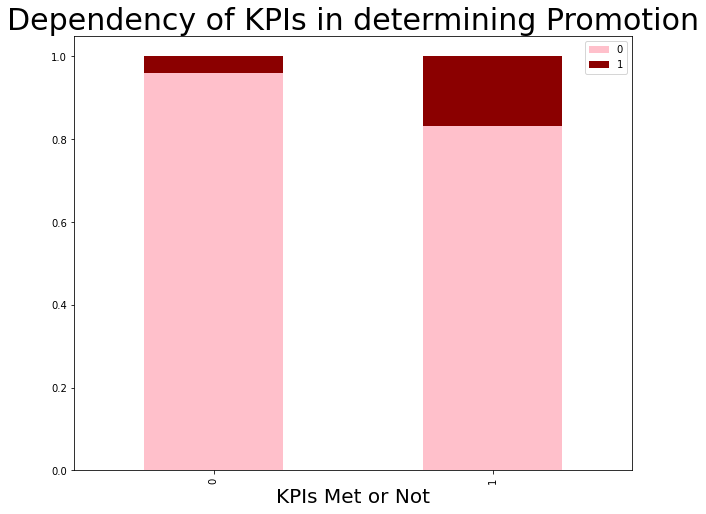

In [32]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

**Again Having a good KPI score increases the chances of getting promoted in the company.**

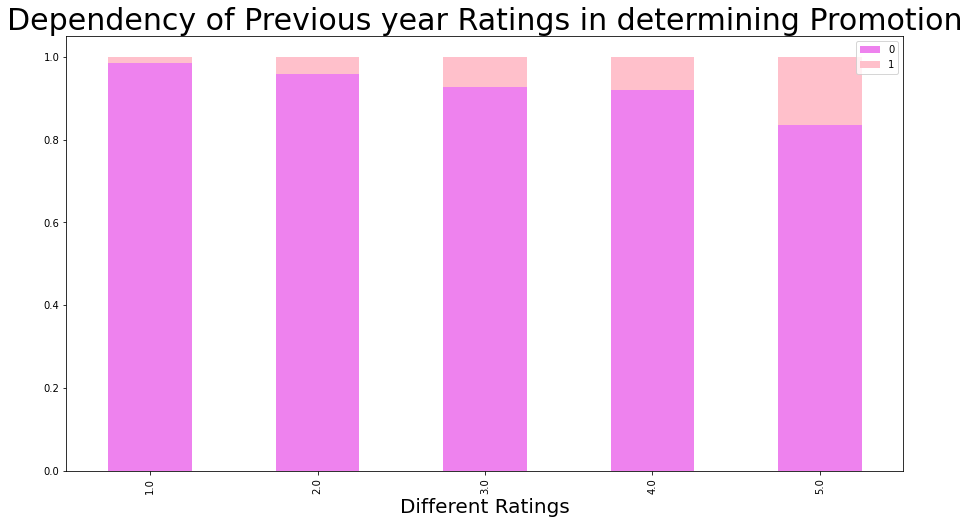

In [33]:
# checking dependency on previous years' ratings

data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

**The Above Graph clearly suggests that previous ratings matter a lot, if the ratings are high, the chances of being promoted  in the company increases and there is completely no promotion for the employees with previous year ratings = 0**

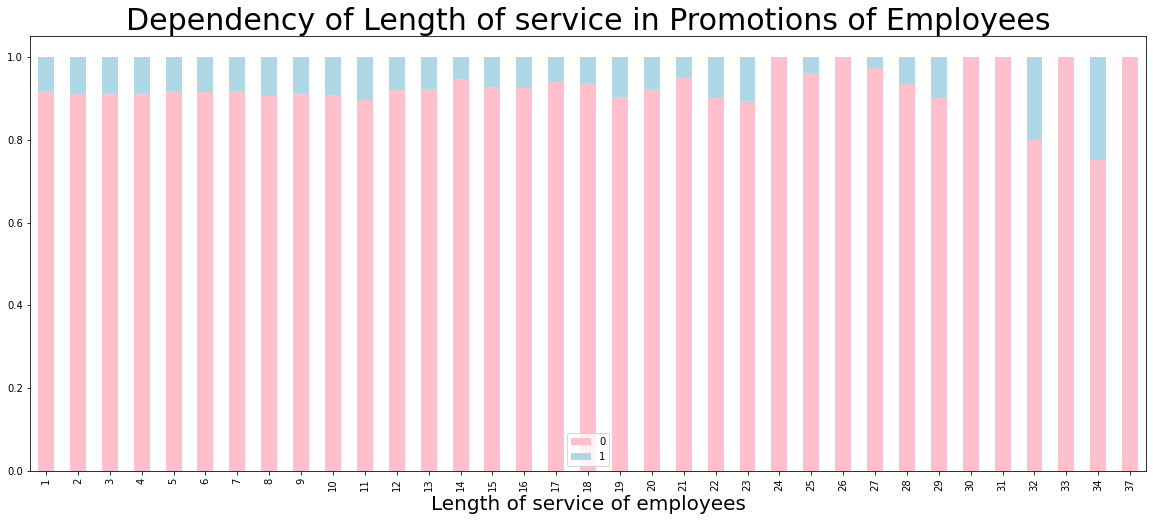

In [34]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

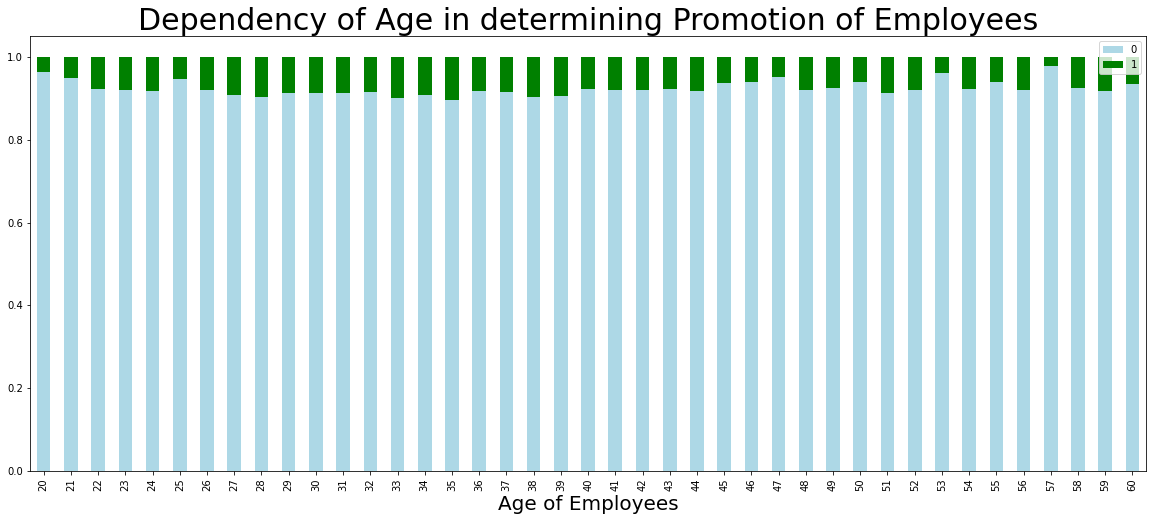

In [35]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

**This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company**

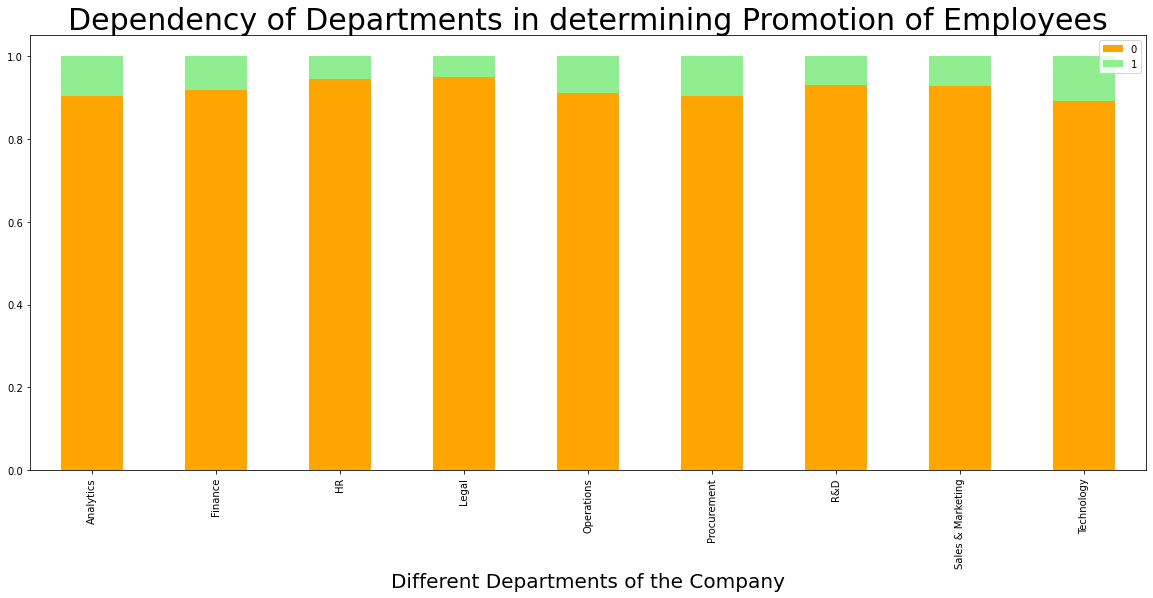

In [36]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

**Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.**

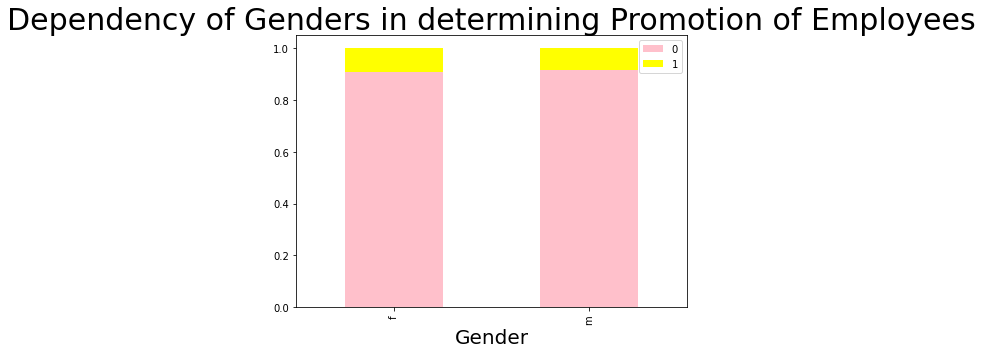

In [37]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

**The above plot shows that there is no partiality between males and females in terms of promotion**

**Data Pre-processing**

In [38]:
# filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [39]:
# filling missing values

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [40]:
# removing the employee_id column

train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [41]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)

test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [42]:
# defining the test set

x_test = test

x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [43]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [44]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [45]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

**Oversampling of the Model**

In [46]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [47]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [0]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

In [49]:
# applying pca

'''
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_valid = pca.transform(x_valid)

'''

'\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = None)\nx_train = pca.fit_transform(x_train)\nx_test = pca.transform(x_test)\nx_valid = pca.transform(x_valid)\n\n'

**Modelling**

**Random Forest Classifer**

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

'''
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Training Accuracy : 0.9998753490227363


'\nprint("Validation Accuracy :", rfc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, rfc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, rfc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, rfc_pred)\nprint("Average Precision Score :", apc)\n'

**Xg-Boost Classifier**

In [51]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))
'''
print("Validation Accuracy :", xgb.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, xgb_pred)
print(cm)

cr = classification_report(y_valid, xgb_pred)
print(cr)

apc = average_precision_score(y_valid, xgb_pred)
print("Average Precision Score :", apc)
'''

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.9482199840446749


'\nprint("Validation Accuracy :", xgb.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, xgb_pred)\nprint(cm)\n\ncr = classification_report(y_valid, xgb_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, xgb_pred)\nprint("Average Precision Score :", apc)\n'

**Light Gradient Boosting Classifier**

In [52]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))
'''
print("Validation Accuracy :", lgb.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, lgb_pred)
print(cm)

cr = classification_report(y_valid, lgb_pred)
print(cr)

apc = average_precision_score(y_valid, lgb_pred)
print("Average Precision Score :", apc)
'''

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.966743119266055


'\nprint("Validation Accuracy :", lgb.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, lgb_pred)\nprint(cm)\n\ncr = classification_report(y_valid, lgb_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, lgb_pred)\nprint("Average Precision Score :", apc)\n'

**Extra Trees Classifier**

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))
'''
print("Validation Accuracy :", etc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, etc_pred)
print(cm)

cr = classification_report(y_valid, etc_pred)
print(cr)

apc = average_precision_score(y_valid, etc_pred)
print("Average Precision Score :", apc)
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy : 0.9998753490227363


'\nprint("Validation Accuracy :", etc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, etc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, etc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, etc_pred)\nprint("Average Precision Score :", apc)\n'

**Cat Boost Classifier**

In [54]:
!pip install catboost

     |████████████████████████████████| 64.8MB 57kB/s 


In [55]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))
'''
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, cbc_pred)
print(cm)

cr = classification_report(y_valid, cbc_pred)
print(cr)

apc = average_precision_score(y_valid, cbc_pred)
print("Average Precision Score :", apc)
'''

0:	learn: 0.6885418	total: 116ms	remaining: 1m 55s
1:	learn: 0.6841025	total: 177ms	remaining: 1m 28s
2:	learn: 0.6797151	total: 240ms	remaining: 1m 19s
3:	learn: 0.6752144	total: 308ms	remaining: 1m 16s
4:	learn: 0.6707846	total: 379ms	remaining: 1m 15s
5:	learn: 0.6665521	total: 441ms	remaining: 1m 13s
6:	learn: 0.6625945	total: 509ms	remaining: 1m 12s
7:	learn: 0.6586178	total: 571ms	remaining: 1m 10s
8:	learn: 0.6549100	total: 637ms	remaining: 1m 10s
9:	learn: 0.6503820	total: 699ms	remaining: 1m 9s
10:	learn: 0.6466073	total: 763ms	remaining: 1m 8s
11:	learn: 0.6427233	total: 835ms	remaining: 1m 8s
12:	learn: 0.6386874	total: 899ms	remaining: 1m 8s
13:	learn: 0.6349318	total: 961ms	remaining: 1m 7s
14:	learn: 0.6311360	total: 1.03s	remaining: 1m 7s
15:	learn: 0.6274514	total: 1.1s	remaining: 1m 7s
16:	learn: 0.6237147	total: 1.16s	remaining: 1m 7s
17:	learn: 0.6201991	total: 1.23s	remaining: 1m 6s
18:	learn: 0.6168057	total: 1.29s	remaining: 1m 6s
19:	learn: 0.6133509	total: 1.35s

'\nprint("Validation Accuracy :", rfc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, cbc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, cbc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, cbc_pred)\nprint("Average Precision Score :", apc)\n'

**Stacking of models**

In [56]:
'''

# defining the stacked predictions

stacked_predictions = np.column_stack((rfc_pred, xgb_pred, cbc_pred))

# specifyinng the meta model
meta_model = RandomForestClassifier()
meta_model.fit(stacked_predictions, )

# final predictions
stacked_predictions = meta_model.predict(stacked_predictions)

cm = confusion_matrix(y_valid, stacked_predictions)
print(cm)

cr = classification_report(y_valid, stacked_predictions)
print(cr)

apc = average_precision_score(y_valid, stacked_predictions)
print("Average Precision Score :", apc)
'''

'\n\n# defining the stacked predictions\n\nstacked_predictions = np.column_stack((rfc_pred, xgb_pred, cbc_pred))\n\n# specifyinng the meta model\nmeta_model = RandomForestClassifier()\nmeta_model.fit(stacked_predictions, )\n\n# final predictions\nstacked_predictions = meta_model.predict(stacked_predictions)\n\ncm = confusion_matrix(y_valid, stacked_predictions)\nprint(cm)\n\ncr = classification_report(y_valid, stacked_predictions)\nprint(cr)\n\napc = average_precision_score(y_valid, stacked_predictions)\nprint("Average Precision Score :", apc)\n'

**Boosting the Model**

In [57]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3

'''
apc = average_precision_score(y_valid, boosted_predictions)
print("Average Precision Score :", apc)
'''

'\napc = average_precision_score(y_valid, boosted_predictions)\nprint("Average Precision Score :", apc)\n'

In [59]:
# looking at the pattern of the submission file

submission = pd.read_csv('drive/My Drive/Projects/HR Analytics/sample_submission.csv')

submission.head()


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [60]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': boosted_predictions})

submission.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [64]:
# saving the submission file

filename = 'submission.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  submission.csv
